# Introduction to Machine Learning

Machine learning is concerned with the development of computer algorithms that improve their performance at given tasks with experience. Examples include:
1. Speech recognition
1. Image recognition
1. Autonomous driving

Take for example an algorithm that is designed to determine the class of a given hand written digit. This task is known as $\textbf{classification}$ and involves assigning inputs to the algorithm to various classes. In this case, the digits are drawn from one of $\{0, 1, \ldots, 9\}$. Examples from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) data set are shown below

![](../figures/MnistExamples.png)

Given a single image as input, a machine learning algorithm would return the correct class. This can be expressed as a function mapping the set to images to the set $\{0, 1, \ldots, 9\}$. 

How do we go about building such an algorithm? We need the following ingredients
1. Data: Our algorithm will learn from experience which takes the form of labelled data examples. These could be images with a single digits
2. We need a model that takes as input the image and returns the likely digit. This model will improve with access to more data
3. We need a performance measure. How do we determine that the algorithm is improving with experience? This could involve measuring accuracy.
4. A learning algorithm. Models often contain parameters whose values are modified to improve performance. The learning algorithm modifies these parameter values to improve performance.

## Machine Learning in Action
Let us explore machine learning using a concrete example in image recognition.

### Image recognition
We will see the steps involved in building an algorithm capable of recognising hand written digits. We start off with the data. We will us MNIST data which contains 70000 examples with labels. Lets obtain the data which are freely available. Often in applications, you have to obtain and label your own data!

In [1]:
# data acquisition
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


#### Data 
The data is divided into two sets, a training set and a test set. We use the training set to modify the parameters of our model and then use the test set to assess the performance.

One of the first things to do with any data set is to visualise it. Let's visualise a random image.

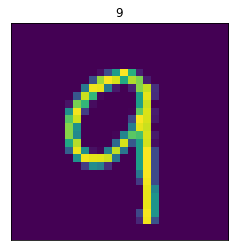

In [2]:
import random
import matplotlib.pyplot as plt
index = random.choice(range(X_train.shape[0]))


%matplotlib inline
plt.figure()
plt.imshow(X_train[index]);
plt.xticks([])
plt.yticks([])
plt.title(y_train[index])

The digits are 28-by-28 pixels grayscale images which we represent as a matrix of numbers between 0 and 255 (8 bits per pixel)

In [3]:
X_train[index].shape

(28, 28)

In [4]:
print(X_train[index].min(), X_train[index].max())

0 255


In addition we flatten the matrix into a vector of length 784 and normalise the elements of the vector to the range $[0, 1]$

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We also turn our labels into what is known as a one hot encoding. These are binary vectors where only one element is 1 and the rest are zero. 

In [6]:
# convert class vectors to binary class matrices
from keras.utils import np_utils
num_digits = 10

Y_train = np_utils.to_categorical(y_train, num_digits)
Y_test = np_utils.to_categorical(y_test, num_digits)

In [7]:
print(y_train[index])
print(Y_train[index])

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


#### Model
Next we create a model which will learn from the data. We will ignore the details for now but it is a multilayer perceptron whose output is the probability of the image belonging to each of the 10 digit classes.

In [8]:
from models import create_mnist_model
model = create_mnist_model()

As it is, the model parameters are random and we would not expect it to perform well. 

1/1 [==============================] - 0s 33ms/step


array([2])

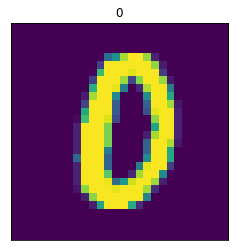

In [9]:
test_index = random.choice(range(X_test.shape[0]))
plt.figure()
plt.imshow(X_test[test_index].reshape(28, 28));
plt.xticks([])
plt.yticks([])
plt.title(y_test[test_index])


model.predict_classes(X_test[test_index, :][None, :])

#### Training
We now use the training data to improve the model performance.

In [10]:
batch_size = 10
num_epoch = 2
model.fit(X_train, 
          Y_train, 
          batch_size=batch_size, 
          epochs=num_epoch, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2823 - acc: 0.9321 - val_loss: 0.1874 - val_acc: 0.9658
Epoch 2/2
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2621 - acc: 0.9569 - val_loss: 0.2783 - val_acc: 0.9589


#### Evaluation
After training lets see how the model performs.

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.278253447118
Test accuracy: 0.9589


In [12]:
model.predict_classes(X_test[test_index, :][None, :])

1/1 [==============================] - 0s 2ms/step


array([0])

In the coming weeks and months, we will delve deeper into each of the steps listed and explore other applications.